# **Emotion Detection**

## **Download dataset from Kaggle**

https://www.kaggle.com/datasets/msambare/fer2013

In [ ]:
#install Kaggle
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ltp0203","key":"fffdf39b9c00572aa906e7402280150a"}'}

In [4]:
#Create kaggle folder
! mkdir ~/.kaggle

In [5]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [6]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Download dataset from kaggle FER2013
! kaggle datasets download -d msambare/fer2013

 55% 33.0M/60.3M [00:00<00:00, 117MB/s] 
100% 60.3M/60.3M [00:00<00:00, 150MB/s]


In [ ]:
!unzip fer2013.zip

## **Import libraries**

In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
from keras import regularizers
import os
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Define train, test path
train_path = "/content/train"
test_path = "/content/test"

## **Data Augmentation**

A technique to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation.

In [11]:
# create objects for Data Generation
# Some kinds of data augmentation
# zoom_range: thực hiện zoom ngẫu nhiên trong một phạm vi nào đó
# width_shift_range: Dịch theo chiều ngang ngẫu nhiên trong một phạm vi nào đó
# height_shift_range: Dịch ảnh theo chiều dọc trong một phạm vi nào đó
# brightness_range: Tăng cường độ sáng của ảnh trong một phạm vi nào đó.
# vertical_flip: Lật ảnh ngẫu nhiên theo chiều dọc
# rotation_range: Xoay ảnh góc tối đa là 45 độ
# shear_range: Làm méo ảnh
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

In [12]:
# Augmenting train and test
# directory: đặt đường dẫn có các classes của folder.
# target_size: là size của các ảnh input đầu vào, mỗi ảnh sẽ được resized theo kích thước này.
# color_mode: Nếu hình ảnh là màu đen và màu trắng hoặci là grayscale thì set "grayscale" hoặc nếu nó gồm 3 channels thì set "rgb"
# batch_size : Số lượng ảnh được yielded từ generator cho mỗi lô batch.
# class_mode : set "binary" nếu bạn có 2 classes để dự đoán, nếu không thì bạn set "categorical". trong trường hợp nếu bạn đang lập trình một hệ thống tự động Autoencoder, thì cả input và output đều là ảnh, trong trường hợp này thì bạn set là input
# shuffle: set True nếu bạn muốn đổi thứ tự hình ảnh, ngược lại set False.
# seed : Random seed để áp dụng tăng hình ảnh ngẫu nhiên và xáo trộn thứ tự của hình ảnh
train_set = train_datagen.flow_from_directory(train_path,target_size=(72,72),
                                              batch_size=64, color_mode="grayscale",
                                              class_mode = "categorical")
test_set=test_datagen.flow_from_directory(test_path,
                                             target_size=(72,72),
                                             batch_size=64,
                                             color_mode='grayscale',
                                             class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Show label
train_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
# Function to print training samples in train set
def plot_images(img_dir, label):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:8]
    plt.figure(figsize=(20, 20))
    for idx, img_path in enumerate(img_files):
        plt.subplot(8, 8, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title('{}'.format(str(label)))

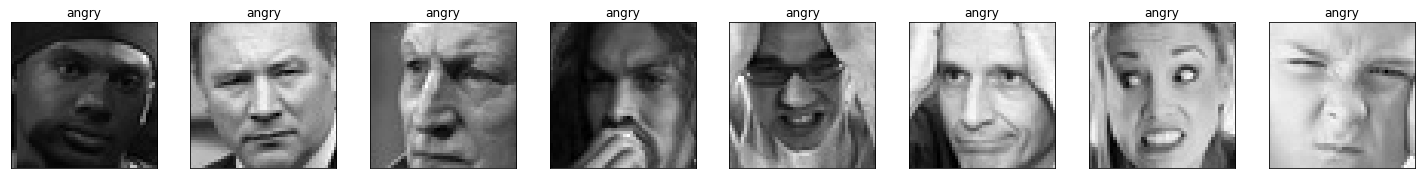

In [ ]:
# Plot angry training sample
plot_images(train_path+'/angry','angry')

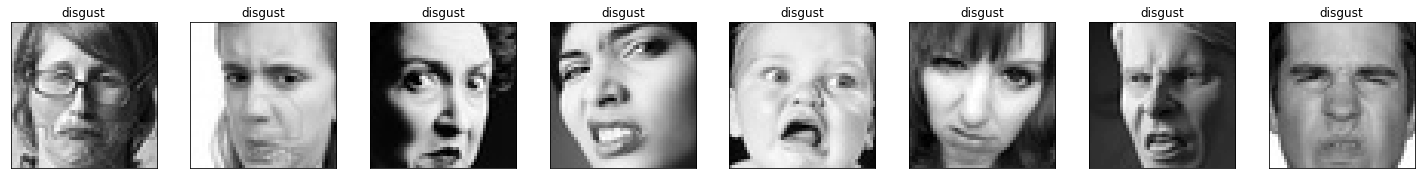

In [ ]:
# Plot disgust training sample
plot_images(train_path+'/disgust','disgust')

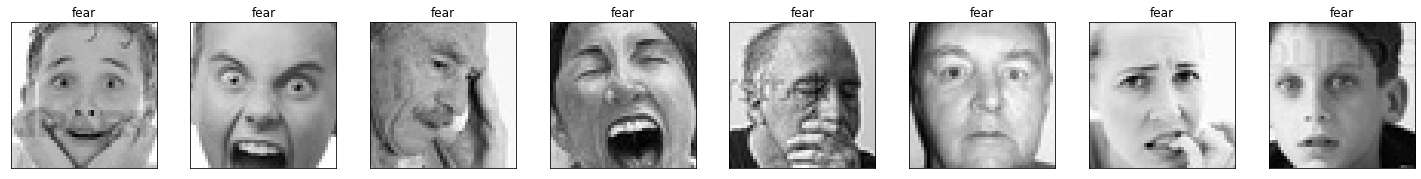

In [ ]:
# Plot fear training sample
plot_images(train_path+'/fear','fear')

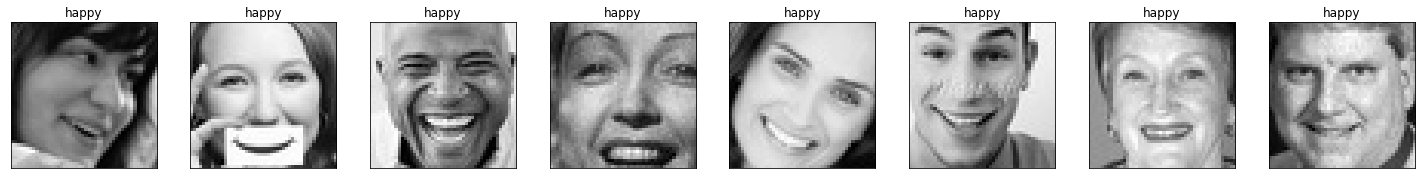

In [ ]:
# Plot happy training sample
plot_images(train_path+'/happy','happy')

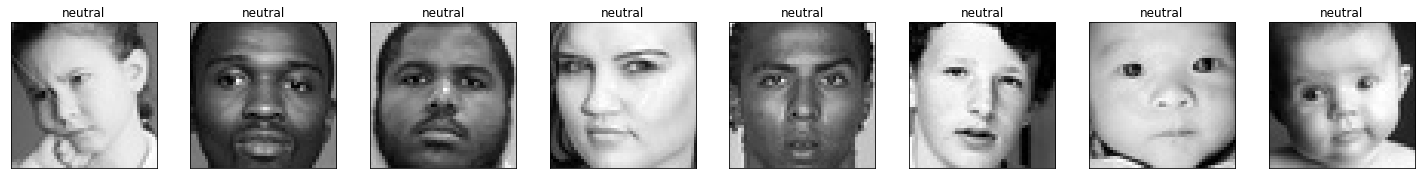

In [ ]:
# Plot neutral training sample
plot_images(train_path+'/neutral','neutral')

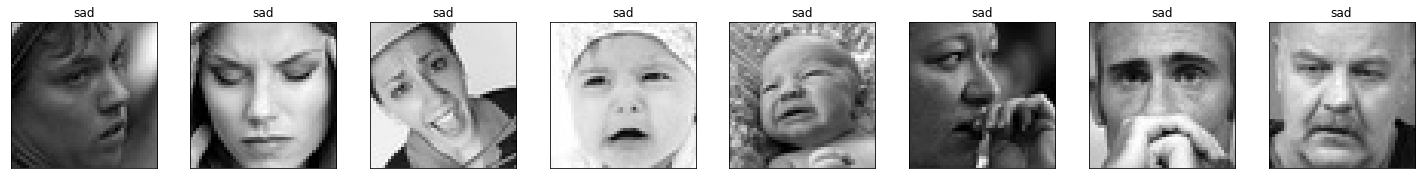

In [ ]:
# Plot sad training sample
plot_images(train_path+'/sad','sad')

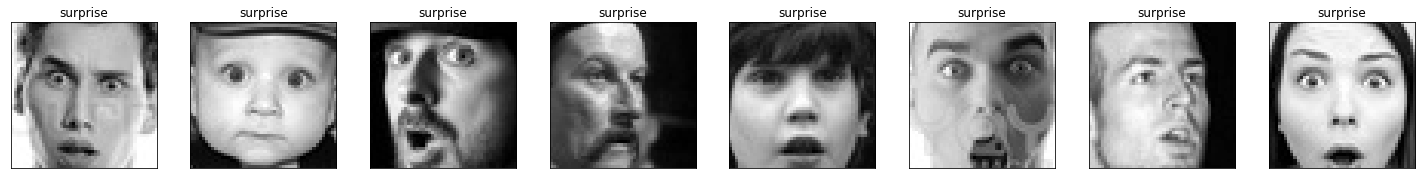

In [ ]:
# Plot surprise training sample
plot_images(train_path+'/surprise','surprise')

## **Build model**

In [13]:
# Define input_shape to CNN model
# img_rows, img_colums, color_channels
input_shape = (72,72,1)
num_classes = 7

In [14]:
model = models.Sequential()
# First
model.add(layers.Conv2D(32,kernel_size=(3,3),activation = 'relu', padding='same', input_shape = input_shape))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.30))
# Second
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.30))
# Third
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.30))
# Fully connected
model.add(layers.Flatten())
# Input layer includes 1024 nodes
model.add(layers.Dense(512, activation='relu'))
# Hidden layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 72, 72, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 72, 72, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 64)        1

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## **Train model**

In [16]:
batch_size = 64
STEP_SIZE_TRAIN = train_set.n//train_set.batch_size
STEP_SIZE_VAL   = test_set.n//test_set.batch_size

In [17]:
result = model.fit(train_set, steps_per_epoch=STEP_SIZE_TRAIN, epochs=80, verbose=1, validation_data=test_set, validation_steps=STEP_SIZE_VAL)

Epoch 1/80
448/448 [==============================] - 45s 73ms/step - loss: 1.9783 - accuracy: 0.2567 - val_loss: 1.8664 - val_accuracy: 0.2630
Epoch 2/80
448/448 [==============================] - 31s 69ms/step - loss: 1.6827 - accuracy: 0.3259 - val_loss: 1.6478 - val_accuracy: 0.3465
Epoch 3/80
448/448 [==============================] - 31s 69ms/step - loss: 1.5366 - accuracy: 0.3846 - val_loss: 1.4769 - val_accuracy: 0.4122
Epoch 4/80
448/448 [==============================] - 31s 69ms/step - loss: 1.4343 - accuracy: 0.4199 - val_loss: 1.4226 - val_accuracy: 0.4255
Epoch 5/80
448/448 [==============================] - 31s 70ms/step - loss: 1.3832 - accuracy: 0.4427 - val_loss: 1.3352 - val_accuracy: 0.4593
Epoch 6/80
448/448 [==============================] - 32s 71ms/step - loss: 1.3327 - accuracy: 0.4599 - val_loss: 1.3712 - val_accuracy: 0.4450
Epoch 7/80
448/448 [==============================] - 32s 71ms/step - loss: 1.2718 - accuracy: 0.5012 - val_loss: 1.3207 - val_accuracy:

In [ ]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## **Evaluation**

In [18]:
train_loss, train_accu = model.evaluate(train_set)
test_loss, test_accu = model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu, test_accu))

113/113 [==============================] - 3s 23ms/step - loss: 1.7181 - accuracy: 0.6372
final train accuracy = 0.97 , validation accuracy = 0.64


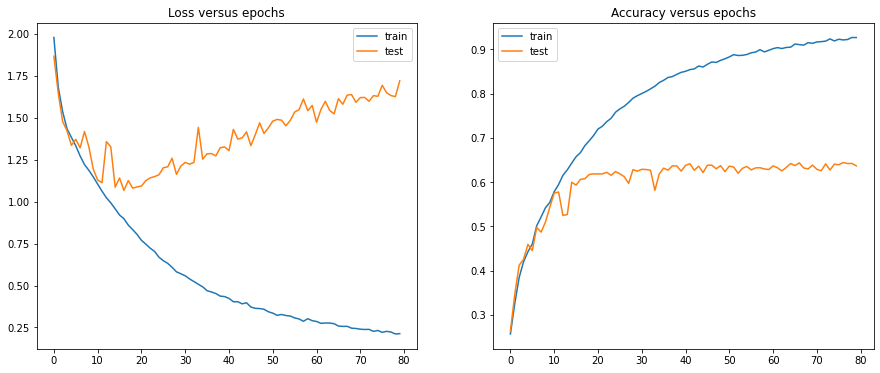

In [22]:
# Accuracy curve
fig, ag = plt.subplots(1,2,figsize = (15,6))
ag[0].plot(result.history['loss'],label = 'train')
ag[0].plot(result.history['val_loss'],label = 'test')
ag[0].legend()
ag[0].set_title('Loss versus epochs')

ag[1].plot(result.history['accuracy'],label='train')
ag[1].plot(result.history['val_accuracy'],label='test')
ag[1].legend()
ag[1].set_title('Accuracy versus epochs')
plt.show()

## **Save model**

In [19]:
model.save('/content/drive/MyDrive/DATASET/FER_model.h5')

In [21]:
model.save_weights('/content/drive/MyDrive/DATASET/FER_model_weight.h5')

## **Test with images**

In [ ]:
# Function to check random 5 image in each emotion
from tensorflow.keras.preprocessing import image
classes = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
def show(list_emotion, label):
  fig = plt.figure(figsize = (20,4))
  test_image =[]
  array_image = []
  predict_list = []
  pred=[]
  for img in range(5):
    plt.subplot(1,5,img+1)
    test_image.append(image.load_img(list_emotion[img],target_size=(72,72),color_mode='grayscale'))
    array_image.append(image.img_to_array(test_image[img]))
    predict_list.append(model.predict(array_image[img].reshape(1,72,72,1)/255))
    max_index = np.argmax(predict_list[img][0])
    pred.append(classes[max_index])
    plt.title('Predict: {}-->Actual: {}'.format(pred[img],label))
    plt.imshow(array_image[img].reshape(72,72))

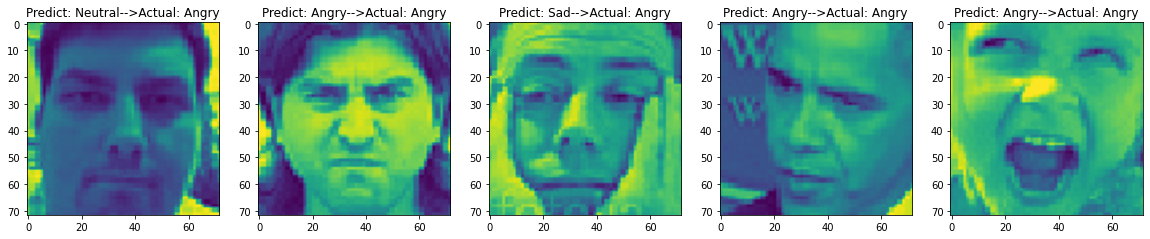

In [ ]:
# Predict class ANGRY
list_angry_img = ['/content/test/angry/PrivateTest_97823562.jpg','/content/test/angry/PrivateTest_63729606.jpg',
                  '/content/test/angry/PrivateTest_2328297.jpg','/content/test/angry/PrivateTest_44437242.jpg',
                  '/content/test/angry/PublicTest_14798104.jpg']
show(list_angry_img,'Angry')
# 3/5 correct

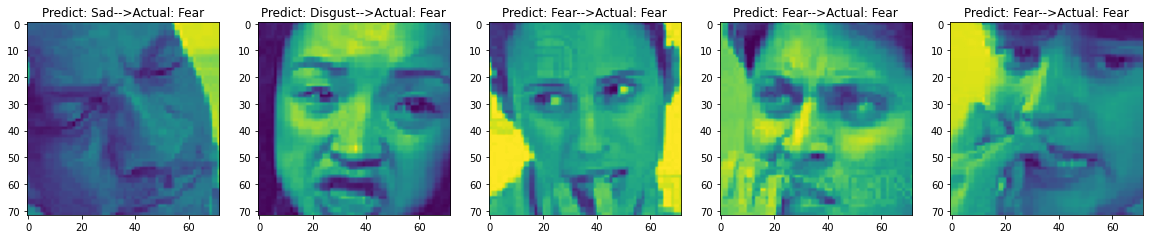

In [ ]:
# Predict class FEAR
list_fear_img = ['/content/test/fear/PrivateTest_82926425.jpg','/content/test/fear/PrivateTest_16750126.jpg',
                  '/content/test/fear/PrivateTest_6742348.jpg','/content/test/fear/PrivateTest_31565397.jpg',
                  '/content/test/fear/PrivateTest_62979698.jpg']
show(list_fear_img,'Fear')
# 3/5 correct

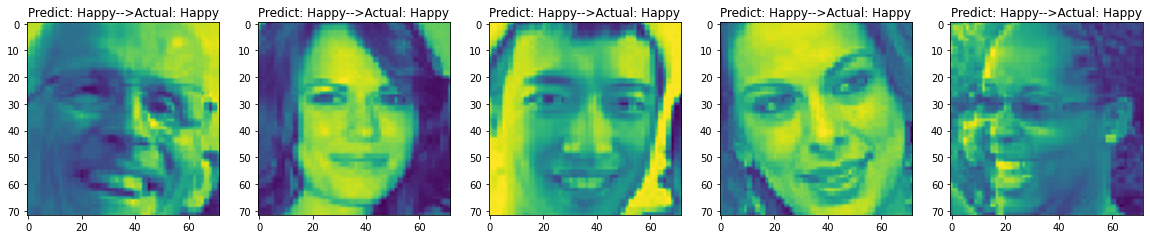

In [ ]:
# Predict class HAPPY
list_happy_img = ['/content/test/happy/PrivateTest_14768445.jpg','/content/test/happy/PrivateTest_18691574.jpg',
                  '/content/test/happy/PrivateTest_23782289.jpg','/content/test/happy/PrivateTest_30199869.jpg',
                  '/content/test/happy/PrivateTest_34192971.jpg']
show(list_happy_img,'Happy')
# 5/5 correct

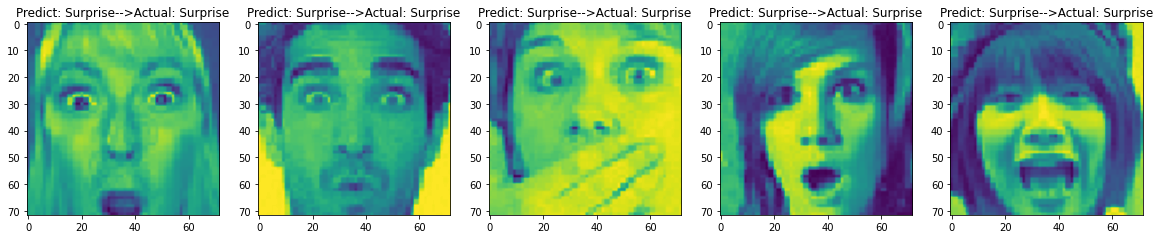

In [ ]:
# Predict class SURPRISE
list_surprise_img = ['/content/test/surprise/PrivateTest_1388103.jpg','/content/test/surprise/PrivateTest_28459548.jpg',
                  '/content/test/surprise/PrivateTest_45239840.jpg','/content/test/surprise/PrivateTest_87304390.jpg',
                  '/content/test/surprise/PrivateTest_75549401.jpg']
show(list_surprise_img,'Surprise')
# 5/5 correct

In [ ]:
# Function to check numbers of correct test images in each type of emotions
def model_predict(img_path,label):
    classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
    all_img_directory = os.listdir(img_path)
    img_file = [os.path.join(img_path,file) for file in all_img_directory]
    sample = len(img_file)
    pred = []
    correct = []
    for img in range(len(img_file)):
      image_test = image.load_img(img_file[img],target_size=(72,72),color_mode='grayscale')
      image_test = image.img_to_array(image_test)
      predict = model.predict(image_test.reshape(1,72,72,1)/255)
      result = classes[np.argmax(predict[0])]
      if str(result) == str(label):
        correct.append(img_file[img])
    proba_correct = len(correct)/len(img_file)
    return proba_correct, correct, sample

In [ ]:
# Function to count TRUE probability and COUNT number of CORRECT samples
def evaluate_class(path, label):
    proba, correct, sample = model_predict(path,label)
    print('---------------------------------------------------------------------------')
    print('True probability of {} class: {}'.format(label,proba))
    print('Number of correctly predicted samples in {} class: {}/{}'.format(label,len(correct),sample))
    print('---------------------------------------------------------------------------')

In [ ]:
list_path =  [test_path+'/angry',test_path+'/disgust',test_path+'/fear',
           test_path+'/happy',test_path+'/neutral',test_path+'/sad',test_path+'/surprise']
label = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
for i in range(len(label)):
  evaluate_class(list_path[i],label[i])


---------------------------------------------------------------------------
True probability of Angry class: 0.5469728601252609
Number of correctly predicted samples in Angry class: 524/958
---------------------------------------------------------------------------
---------------------------------------------------------------------------
True probability of Disgust class: 0.5855855855855856
Number of correctly predicted samples in Disgust class: 65/111
---------------------------------------------------------------------------
---------------------------------------------------------------------------
True probability of Fear class: 0.4814453125
Number of correctly predicted samples in Fear class: 493/1024
---------------------------------------------------------------------------
---------------------------------------------------------------------------
True probability of Happy class: 0.8320180383314544
Number of correctly predicted samples in Happy class: 1476/1774
--------------

In [ ]:
model.layers

In [ ]:
model.save('E:\Emojify Project\model.h5')